In [2]:
import scipy.io
import os
import numpy as np


ds=4
iwins=1500
basicdir='/Users/huifangwang/MULANa/SeegData/PS1001/'+'/Win'+str(iwins)

datasets='WB_PS1001WI041222014ts0'
savedir=basicdir+'/stamlnfigure/'
dirname=basicdir+'/ToutResults/'

if not os.path.exists(savedir):
    os.makedirs(savedir)

In [11]:
#Chosen_area=[('SA',10,1),('CC', 13,2),('OR',15,3)]
Chosen_area=[('F',12,1),
            ('T',9,2),
            ('P',9,3)]


In [12]:
bnom=datasets+'ds4'
toutprenom='Tout_'+str(iwins)+'_'+bnom+'.mat'
savebnom='BMplot'+bnom+'.png'
matBM = scipy.io.loadmat(dirname+toutprenom)

In [13]:
showMethods=['BCorrU','PCorrU','BCorrD','PCorrD',
                         'BTEU','PTEU','BTED','PTED',
                         'MVAR','AS','Af','PDC','oPDCF','GPDC','DC1','DTF','GGC','ffDTF','dDTF','COH1','pCOH1','COH2','pCOH2','Smvar','hmvar']

In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
fline=-0.5
nlead=[iarea[1]-1 for iarea in Chosen_area]
lline=[nlead[0]+fline,nlead[0]+nlead[1]+fline]

tick=[np.sum(nlead[:indl])+ilead/2. for indl,ilead in enumerate(nlead)]
area=[iarea[0] for iarea in Chosen_area]

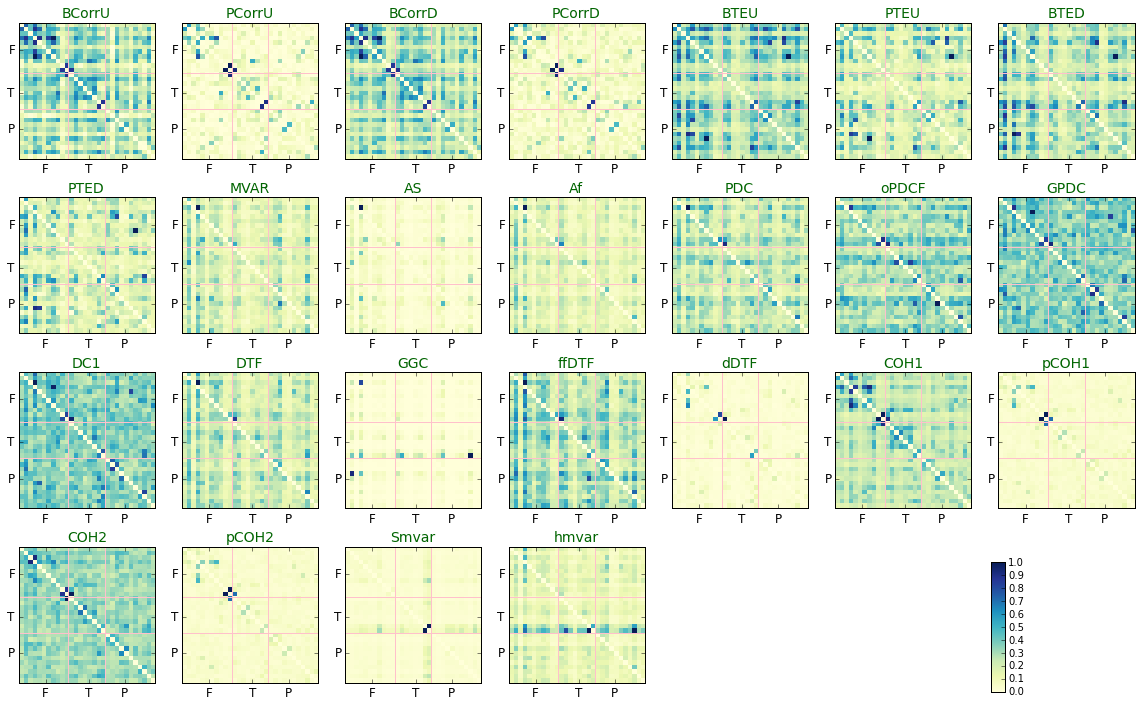

In [20]:

fig = plt.figure(figsize=[20,12])
nBM=np.size(showMethods)

cmap=plt.cm.YlGnBu
nrow=4

#cmap=mln.speCmap(cmap,r=(0,0.8),su={'color':'white'})
for index,iBMed in enumerate(showMethods):
    ax = fig.add_subplot(nrow,nBM/nrow+1,index+1)
    iBM=matBM[iBMed]
    BMmean=iBM.mean(axis=2)
    BMmean=np.abs(np.real(BMmean))
    BMmean=BMmean-np.diag(BMmean.diagonal())
    BMmean=BMmean/BMmean.max()
    cax=plt.imshow(BMmean,cmap=cmap,interpolation='nearest')
    plt.title(iBMed,fontsize=14,color='DarkGreen')
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    for illine in lline:
        plt.axvline(x=illine,ymin=-0.5,ymax=34.5,color='pink')
        plt.axhline(y=illine,xmin=-0.5,xmax=34.5,color='pink')
    ax.set_xticks(tick)
    ax.set_yticks(tick)
    ax.set_xticklabels(area,fontsize=12)
    ax.set_yticklabels(area,fontsize=12)
axbar=fig.add_axes([0.8,0.12,0.01,0.15])
fig.colorbar(cax,cax = axbar)    
#ax.zaxis.set_ticks([])
#ax.w_xaxis.set_pane_color([23./255.,114./255,69./255,1.])
#ax.w_yaxis.set_pane_color([23./255.,114./255,69./255,1.])
#ax.w_zaxis.set_pane_color([23./255.,114./255,69./255,1.])

plt.savefig(dirname+savebnom, format='png', dpi=300)